# 基于scikit-learn的数据分析模型（3）- 聚类分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from sklearn import linear_model as lm
from sklearn.svm import SVC
import joblib

**包的安装和升级**

pip install joblib

pip install --upgrade pandas

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#什么是聚类分析（Clustering-Analysis)" data-toc-modified-id="什么是聚类分析（Clustering-Analysis)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>什么是聚类分析（Clustering Analysis)</a></span><ul class="toc-item"><li><span><a href="#聚类方法分类" data-toc-modified-id="聚类方法分类-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>聚类方法分类</a></span></li><li><span><a href="#sklearn常用的聚类算法模块cluster提供的聚类算法" data-toc-modified-id="sklearn常用的聚类算法模块cluster提供的聚类算法-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>sklearn常用的聚类算法模块cluster提供的聚类算法</a></span></li><li><span><a href="#sklearn官方网站做的不同方法对比：" data-toc-modified-id="sklearn官方网站做的不同方法对比：-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>sklearn官方网站做的不同方法对比：</a></span></li><li><span><a href="#sklearn聚类算法的实现方法" data-toc-modified-id="sklearn聚类算法的实现方法-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>sklearn聚类算法的实现方法</a></span></li></ul></li><li><span><a href="#sklearn聚类模型---以K-Means算法为例" data-toc-modified-id="sklearn聚类模型---以K-Means算法为例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>sklearn聚类模型 - 以K-Means算法为例</a></span><ul class="toc-item"><li><span><a href="#K-Means算法简介" data-toc-modified-id="K-Means算法简介-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>K-Means算法简介</a></span></li><li><span><a href="#sklearn代码实现---以青春有你1，2选手身高体重数据为样本" data-toc-modified-id="sklearn代码实现---以青春有你1，2选手身高体重数据为样本-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>sklearn代码实现 - 以青春有你1，2选手身高体重数据为样本</a></span></li><li><span><a href="#例2.-与nba球员数据混合一起" data-toc-modified-id="例2.-与nba球员数据混合一起-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>例2. 与nba球员数据混合一起</a></span></li><li><span><a href="#聚类的特征值" data-toc-modified-id="聚类的特征值-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>聚类的特征值</a></span></li></ul></li><li><span><a href="#另一种聚类方法，不需要预设聚类簇数的Mean-Shift" data-toc-modified-id="另一种聚类方法，不需要预设聚类簇数的Mean-Shift-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>另一种聚类方法，不需要预设聚类簇数的Mean Shift</a></span></li><li><span><a href="#作业-（本周三作业）" data-toc-modified-id="作业-（本周三作业）-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>作业 （本周三作业）</a></span></li></ul></div>

## 什么是聚类分析（Clustering Analysis)

聚类的输入是一组未被标记的样本，聚类根据数据自身的距离或相似度将他们划分为若干组，划分的原则是组内样本最小化而组间（外部）距离最大化，如图所示。
![聚类示意图](fig1.png)

### 聚类方法分类

| 算法类别     | 包括的主要算法                                                    |
|:----------|:------------------------------------------------------------|
| 划分（分裂）方法 | K\-Means算法（K\-平均），K\-MEDOIDS算法（K\-中心点）和CLARANS算法（基于选择的算法）。 |
| 层次分析方法   | BIRCH算法（平衡迭代规约和聚类），CURE算法（代表点聚类）和CHAMELEON算法（动态模型）。        |
| 基于密度的方法  | DBSCAN算法（基于高密度连接区域），DENCLUE算法（密度分布函数）和OPTICS算法（对象排序识别）。    |
| 基于网格的方法  | STING算法（统计信息网络），CLIOUE算法（聚类高维空间）和WAVE\-CLUSTER算法（小波变换）。    |

### sklearn常用的聚类算法模块cluster提供的聚类算法

| 函数名称                         | 参数             | 适用范围                 | 距离度量        |
|------------------------------|----------------|----------------------|-------------|
| KMeans                       | 簇数             | 可用于样本数目很大，聚类数目中等的场景。 | 点之间的距离      |
| Spectral clustering          | 簇数             | 可用于样本数目中等，聚类数目较小的场景。 | 图距离         |
| Ward hierarchical clustering | 簇数             | 可用于样本数目较大，聚类数目较大的场景。 | 点之间的距离      |
| Agglomerative clustering     | 簇数，链接类型，距离     | 可用于样本数目较大，聚类数目较大的场景。 | 任意成对点线图间的距离 |
| DBSCAN                       | 半径大小，最低成员数目    | 可用于样本数目很大，聚类数目中等的场景。 | 最近的点之间的距离   |
| Birch                        | 分支因子，阈值，可选全局集群 | 可用于样本数目很大，聚类数目较大的场景。 | 点之间的欧式距离    |


### sklearn官方网站做的不同方法对比：
[https://scikit-learn.org/stable/modules/clustering.html#clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering)

![聚类方法对比](sphx_glr_plot_cluster_comparison_0011.png)

### sklearn聚类算法的实现方法

| 方法名称    | 说明                                                       |
|---------|----------------------------------------------------------|
| fit     | fit方法主要用于训练算法。该方法可接收用于有监督学习的训练集及其标签两个参数，也可以接收用于无监督学习的数据。 |
| predict | predict用于预测有监督学习的测试集标签，亦可以用于划分传入数据的类别。                   |


## sklearn聚类模型 - 以K-Means算法为例

### K-Means算法简介

1. 选择 K 个初始质心，初始质心随机选择即可，每一个质心为一个类
2. 把每个观测指派到离它最近的质心，与质心形成新的类
3. 重新计算每个类的质心，所谓质心就是一个类中的所有观测的平均向量（这里称为向量，是因为每一个观测都包含很多变量，所以我们把一个观测视为一个多维向量，维数由变量数决定）。
4. 重复2. 和 3.
5. 直到质心不在发生变化时或者到达最大迭代次数时

[可供参考：https://zhuanlan.zhihu.com/p/37856153](https://zhuanlan.zhihu.com/p/37856153)

### sklearn代码实现 - 以青春有你1，2选手身高体重数据为样本

In [2]:
from sklearn.cluster import KMeans  #导入KMeans包

In [3]:
boy=pd.read_csv('青春有你1.csv',index_col=0)
girl=pd.read_csv('青春有你2.csv',index_col=0)
idol=pd.concat((girl,boy),axis=0)
idol

,身高,体重
姓名,,
刘亚楠,168.0,46.0
艾依依,163.0,43.0
金子涵,173.0,50.0
希娅,166.0,44.0
宋昭艺,163.0,44.0
...,...,...
赵天戈,183.0,66.0
卡斯柏（退赛）,178.0,68.0
姜圣民（退赛）,180.0,66.0


Text(0.5, 1.0, '待聚类样本')

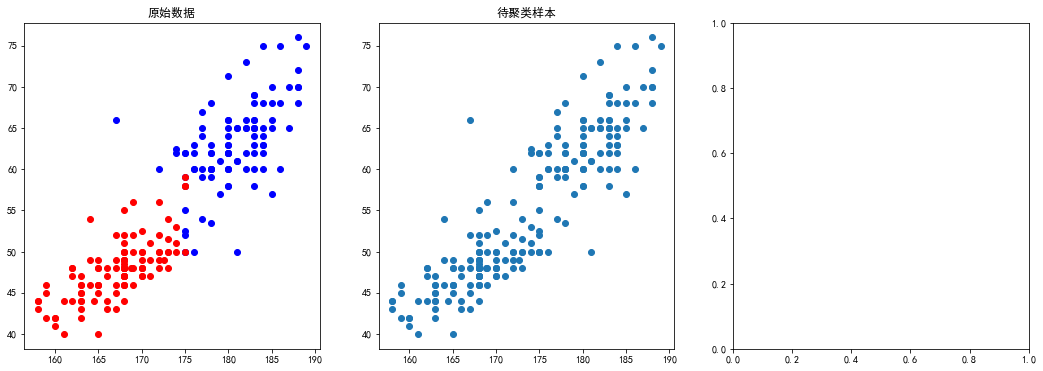

In [4]:
fig_idol,ax_idol=plt.subplots(1,3,figsize=(18,6))
ax_idol[0].scatter(boy['身高'],boy['体重'],c='blue')
ax_idol[0].scatter(girl['身高'],girl['体重'],c='red')
ax_idol[0].set_title('原始数据')
ax_idol[1].scatter(idol['身高'],idol['体重'])
ax_idol[1].set_title('待聚类样本')

In [5]:
kmeans_idol = KMeans(n_clusters=2).fit(idol.values) #尝试分成两类

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

报错内容表示可能存在空值等异常值，我们进行去除

In [6]:
np.unique(idol.isnull())

array([False,  True])

In [7]:
idol.dropna(inplace=True)

In [8]:
kmeans_idol = KMeans(n_clusters=2).fit(idol.values) #尝试分成两类

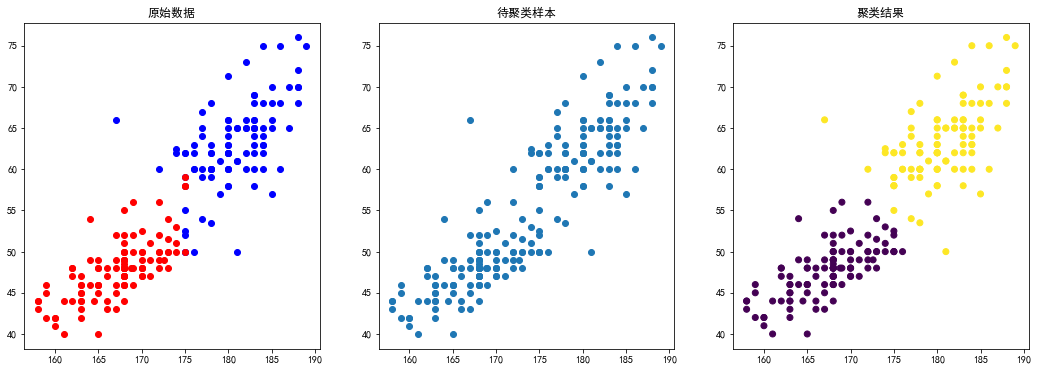

In [9]:
ax_idol[2].scatter(idol['身高'],idol['体重'],c=kmeans_idol.predict(idol.values))
ax_idol[2].set_title('聚类结果')
fig_idol

In [10]:
kmeans_idol.predict([[160,50],[180,70]])

array([0, 1])

### 例2. 与nba球员数据混合一起

In [12]:
idol.head(3)

,身高,体重
姓名,,
刘亚楠,168.0,46.0
艾依依,163.0,43.0
金子涵,173.0,50.0


In [11]:
nba=pd.read_csv('NBA东部联盟球员列表.csv')
nba_data=nba[['身高米','体重kg']]
nba_data

,身高米,体重kg
0,2.01,102
1,1.85,91
2,2.31,131
3,1.93,93
4,2.03,103
...,...,...
244,1.91,88
245,1.83,79
246,1.93,95
247,1.83,79


In [13]:
nba_data.columns=['身高','体重']
nba_data.head(2)

,身高,体重
0,2.01,102
1,1.85,91


In [14]:
nba_data.loc[:,'身高']=nba_data.loc[:,'身高']*100

C:\Users\GeWang\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [15]:
nba_data

,身高,体重
0,201.0,102
1,185.0,91
2,231.0,131
3,193.0,93
4,203.0,103
...,...,...
244,191.0,88
245,183.0,79
246,193.0,95
247,183.0,79


In [16]:
idol_and_nba=pd.concat((idol,nba_data),axis=0)
idol_and_nba

,身高,体重
刘亚楠,168.0,46.0
艾依依,163.0,43.0
金子涵,173.0,50.0
希娅,166.0,44.0
宋昭艺,163.0,44.0
...,...,...
244,191.0,88.0
245,183.0,79.0
246,193.0,95.0
247,183.0,79.0


Text(0.5, 1.0, '待聚类样本')

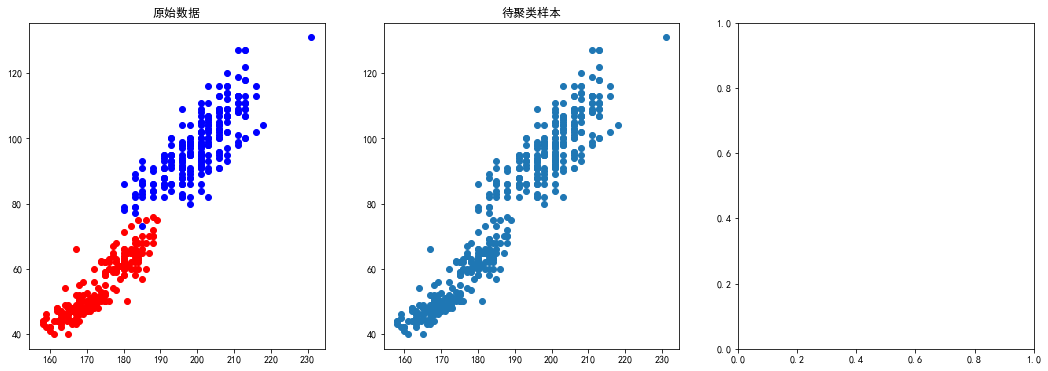

In [17]:
fig_nbaidol,ax_nbaidol=plt.subplots(1,3,figsize=(18,6))
ax_nbaidol[0].scatter(nba_data['身高'],nba_data['体重'],c='blue')
ax_nbaidol[0].scatter(idol['身高'],idol['体重'],c='red')
ax_nbaidol[0].set_title('原始数据')
ax_nbaidol[1].scatter(idol_and_nba['身高'],idol_and_nba['体重'])
ax_nbaidol[1].set_title('待聚类样本')

In [18]:
kmeans_nbaidol = KMeans(n_clusters=3).fit(idol_and_nba.values)

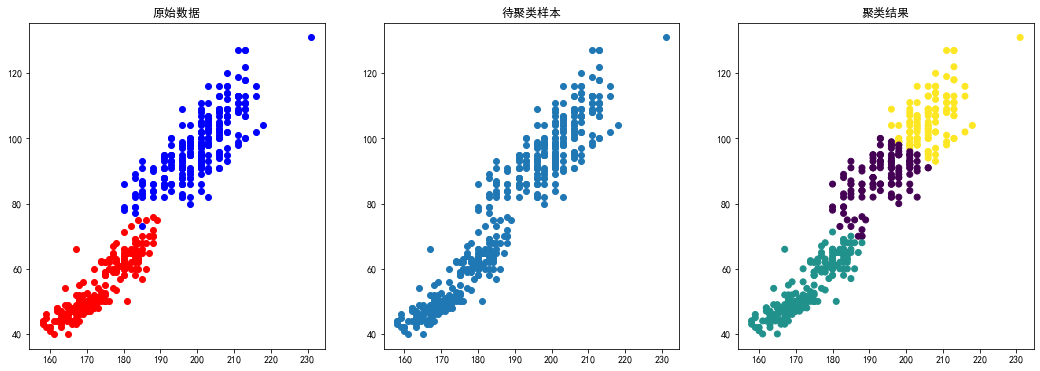

In [19]:
ax_nbaidol[2].scatter(idol_and_nba['身高'],idol_and_nba['体重'],c=kmeans_nbaidol.predict(idol_and_nba.values))
ax_nbaidol[2].set_title('聚类结果')
fig_nbaidol

### 聚类的特征值

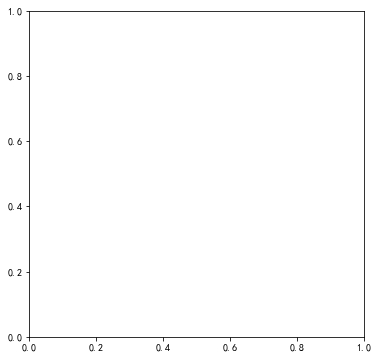

In [20]:
fig_results,ax_results=plt.subplots(figsize=(6,6))

1. 各个样本点的聚类结果  .labels_

In [21]:
kmeans_nbaidol.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,

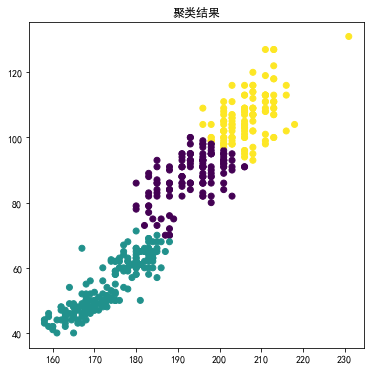

In [22]:
ax_results.scatter(idol_and_nba['身高'],idol_and_nba['体重'],c=kmeans_nbaidol.labels_)
ax_results.set_title('聚类结果')
fig_results

2. 各个类别的中心点

In [23]:
kmeans_nbaidol.cluster_centers_

array([[193.5037037 ,  88.54074074],
       [173.0145    ,  54.2665    ],
       [206.54471545, 106.3495935 ]])

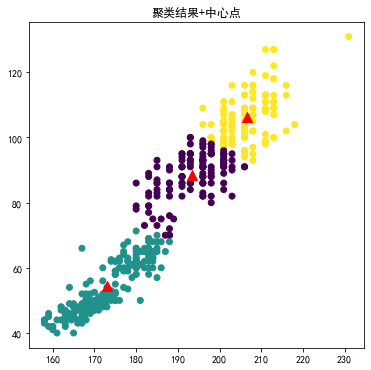

In [24]:
ax_results.scatter(kmeans_nbaidol.cluster_centers_[:,0],kmeans_nbaidol.cluster_centers_[:,1],marker='^',s=100,c='red')
ax_results.set_title('聚类结果+中心点')
fig_results

## 另一种聚类方法，不需要预设聚类簇数的Mean Shift

数学介绍可参考官网[https://scikit-learn.org/stable/modules/clustering.html?highlight=adjusted_rand_score#mean-shift](https://scikit-learn.org/stable/modules/clustering.html?highlight=adjusted_rand_score#mean-shift)

算法的较口语化介绍可以参考[https://www.jianshu.com/p/3087aa859cb8](https://www.jianshu.com/p/3087aa859cb8)

需要导入两个模块，一是sklearn.cluster里的MeanShift，用于做meanshift方法聚类；

二是sklearn.cluster里的estimate_bandwidth，用于做分类半径的估计，这个是MeanShift方法配套专用的。参考：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html#sklearn.cluster.estimate_bandwidth

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth #导入所需模块

In [26]:
bandwidth = estimate_bandwidth(idol_and_nba.values,quantile=0.2,n_samples=len(idol_and_nba)) 
#对用于分类的数据进行一个分类半径的估计,通过更改quantile（0到1之间）的大小可以调整分类半径的大小，半径越小，分类越精细

In [27]:
bandwidth

10.87851951431857

In [28]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)  
#构建一个MeanShift对象，接收的参数主要为半径，bin_seeding=True可以加速运算速度，详见官网介绍

In [29]:
ms.fit(idol_and_nba.values)  #对idol和nba球员的身高体重数据进行拟合聚类

MeanShift(bandwidth=10.87851951431857, bin_seeding=True)

In [30]:
n_clusters = len(ms.cluster_centers_)  #通过看聚类中心点的数量来反映聚类的类数

In [31]:
print("number of estimated clusters : %d" % n_clusters) #输出聚类数

number of estimated clusters : 4


下面将聚类结果可视化出来

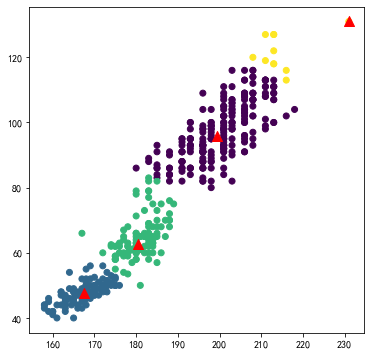

In [32]:
fig_ms,ax_ms=plt.subplots(figsize=(6,6))
ax_ms.scatter(idol_and_nba['身高'],idol_and_nba['体重'],c=ms.labels_)
ax_ms.scatter(ms.cluster_centers_[:,0],ms.cluster_centers_[:,1],marker='^',s=100,c='red')

**需要注意**，图上可以看出，聚类结果受到了孤点的影响，可以尝试将其删去，再次聚类

In [33]:
a=idol_and_nba['身高'].ge(225) #找到孤立点

,身高,体重
2,231.0,131.0


In [34]:
a

刘亚楠    False
艾依依    False
金子涵    False
希娅     False
宋昭艺    False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: 身高, Length: 458, dtype: bool

In [35]:
idol_and_nba[a]

,身高,体重
2,231.0,131.0


In [36]:
newdata=idol_and_nba.drop(2,axis=0) #将孤立点删去，生成新的数据表

对去除孤立点的数据进行meanshift聚类

number of estimated clusters : 3


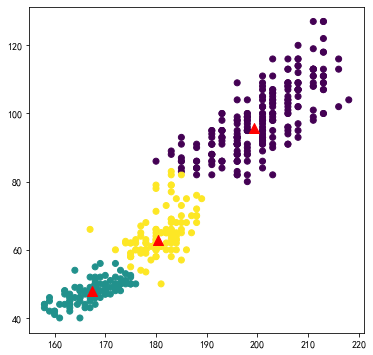

In [37]:
bandwidth = estimate_bandwidth(newdata.values, quantile=0.2, n_samples=len(newdata))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(newdata.values)
print("number of estimated clusters : %d" % len(ms.cluster_centers_))
fig_ms,ax_ms=plt.subplots(figsize=(6,6))
ax_ms.scatter(newdata['身高'],newdata['体重'],c=ms.labels_)
ax_ms.scatter(ms.cluster_centers_[:,0],ms.cluster_centers_[:,1],marker='^',s=100,c='red')

In [39]:
ms.cluster_centers_

array([[199.41044776,  95.85820896],
       [167.43660714,  47.79464286],
       [180.36956522,  62.8076087 ]])

可见，MeanShift聚类方法较好的将女艺人、男艺人、nba球员做出了分类

In [38]:
ms.predict([[170,65]])

array([2], dtype=int64)

## 参考资料
https://blog.csdn.net/weixin_42056745/article/details/101287231

## 作业 （本周三作业）

1. 请同学们自行找一组样本量不少于30的数据，完成一次聚类分析。
2. 并用jupyter notebook里的markdown **简单阐述**：
    - 这组数据是什么
    - 这次聚类分析的目的是什么

邮件主题：python-作业5-姓名

notebook命名：作业5-姓名-学号